In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
import plotly.graph_objs as go 

In [2]:
import pandas as pd

df = pd.read_csv('dst_data.csv')
df['Дата'] = df['Дата'].replace({'24:00':'23:59'}, regex=True)
df

,Дата,Базисное значение,Среднесуточное значение,Текущее значение
0,1957-01-01 0:00,0,4,11
1,1957-01-01 1:00,0,4,13
2,1957-01-01 2:00,0,4,12
3,1957-01-01 3:00,0,4,12
4,1957-01-01 4:00,0,4,9
...,...,...,...,...
529595,2014-12-31 20:00,0,-17,-27
529596,2014-12-31 21:00,0,-17,-27
529597,2014-12-31 22:00,0,-17,-23
529598,2014-12-31 23:00,0,-17,-23


In [3]:
df['Дата'] = pd.to_datetime(df['Дата'])

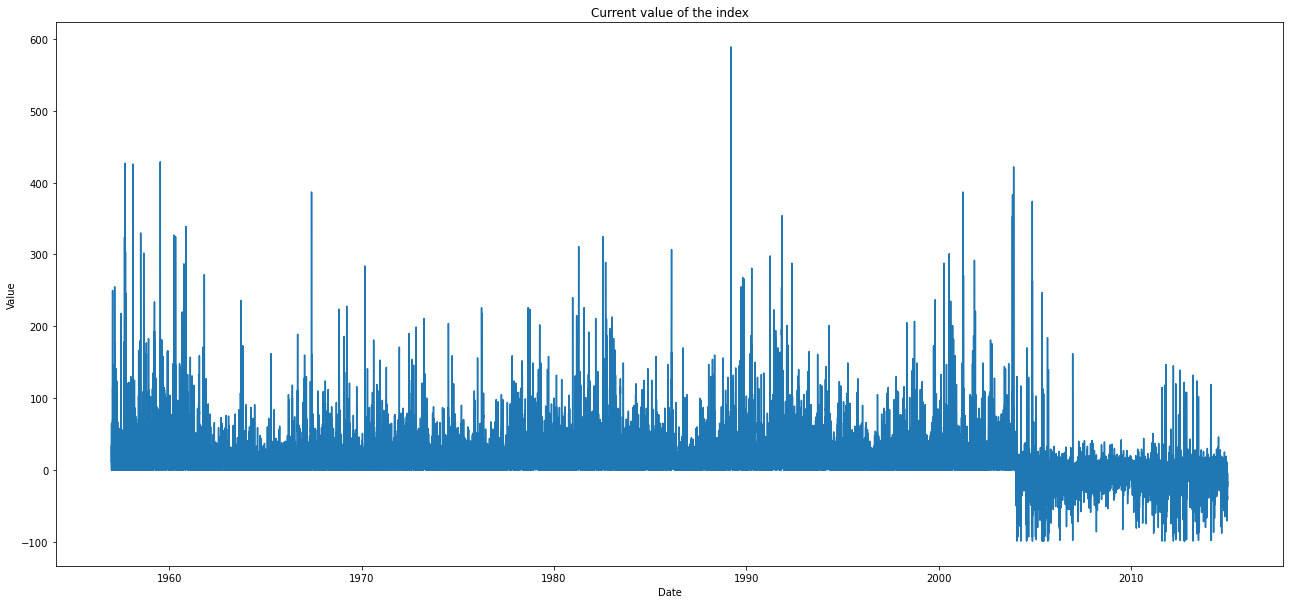

In [4]:
plt.figure(figsize=(22,10))
plt.plot(df['Дата'], df['Текущее значение'])
plt.title('Current value of the index')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

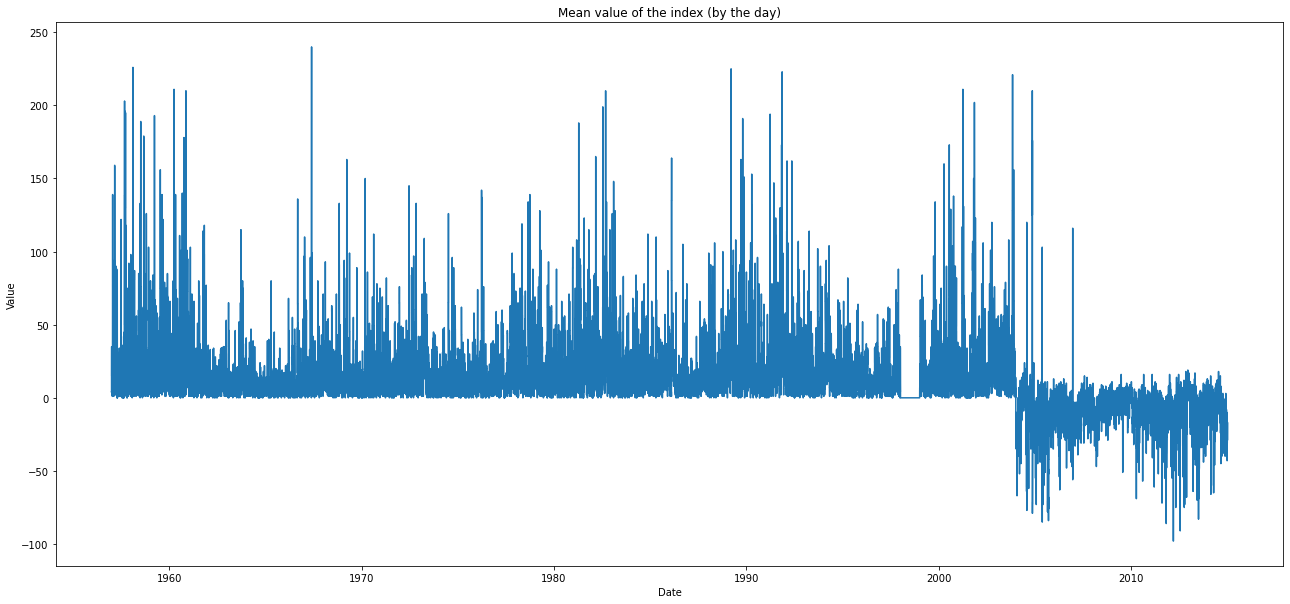

In [5]:
plt.figure(figsize=(22,10))
plt.plot(df['Дата'], df['Среднесуточное значение'])
plt.title('Mean value of the index (by the day)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [6]:
df.loc[df['Дата'] == '2004-01-01 00:00:00']

,Дата,Базисное значение,Среднесуточное значение,Текущее значение
429150,2004-01-01,0,-25,-23


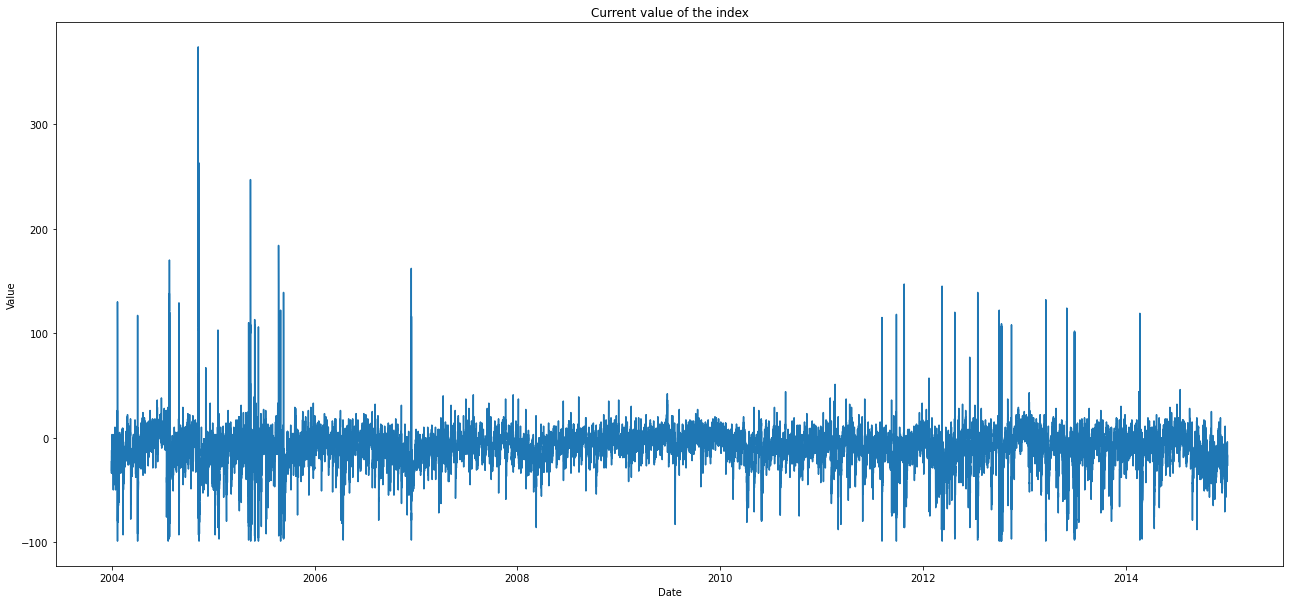

In [7]:
df1 = df.iloc[429150:]
plt.figure(figsize=(22,10))
plt.plot(df1['Дата'], df1['Текущее значение'])
plt.title('Current value of the index')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

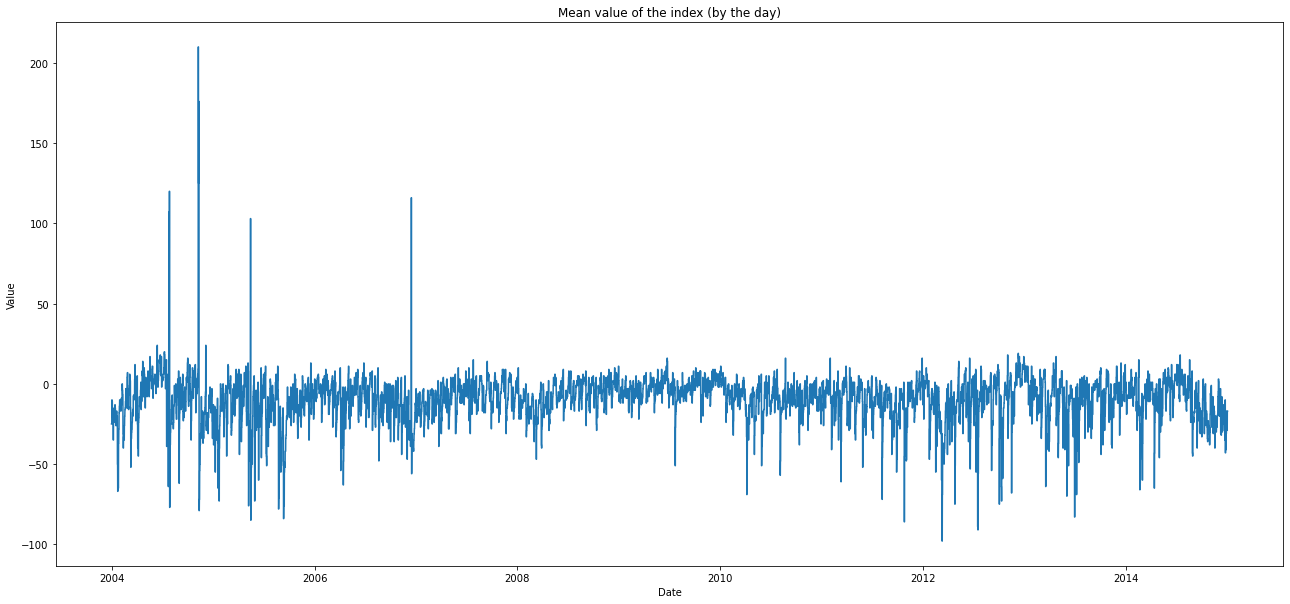

In [8]:
plt.figure(figsize=(22,10))
plt.plot(df1['Дата'], df1['Среднесуточное значение'])
plt.title('Mean value of the index (by the day)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

Stationarity of a Time Series

    There are three basic criterion for a time series to understand whether it is stationary series or not.
        Statistical properties of time series such as mean, variance should remain constant over time to call time series is stationary
            constant mean
            constant variance
            autocovariance that does not depend on time. autocovariance is covariance between time series and lagged time series.
    Lets visualize and check seasonality trend of our time series.


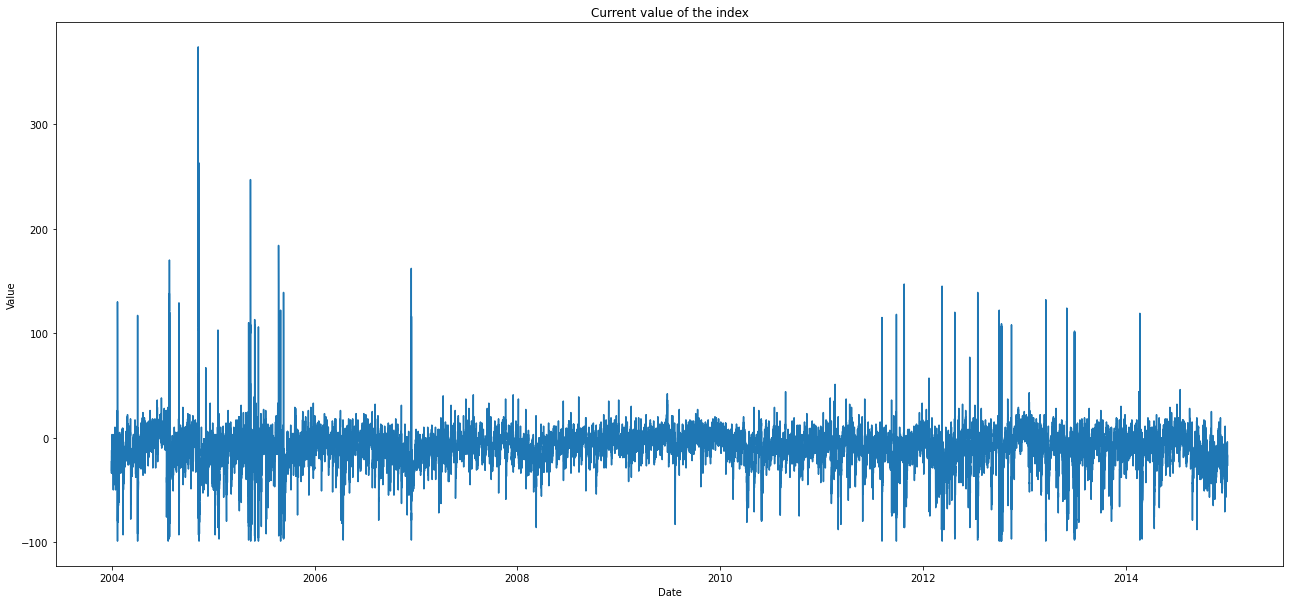

In [9]:
plt.figure(figsize=(22,10))
plt.plot(df1['Дата'], df1['Текущее значение'])
plt.title('Current value of the index')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()




    As you can see from plot above, our time series has seasonal variation. In summer, mean temperature is higher and in winter mean temperature is lower for each year.
    Now lets check stationary of time series. We can check stationarity using the following methods:
        Plotting Rolling Statistics: We have a window lets say window size is 6 and then we find rolling mean and variance to check stationary.
        Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.



In [10]:
timeSeries = df1.loc[:, ['Дата', 'Текущее значение']]
timeSeries.index = timeSeries['Дата']
ts = timeSeries.drop(['Дата'],axis=1)



    As you can see from plot above, our time series has seasonal variation. In summer, mean temperature is higher and in winter mean temperature is lower for each year.
    Now lets check stationary of time series. We can check stationarity using the following methods:
        Plotting Rolling Statistics: We have a window lets say window size is 6 and then we find rolling mean and variance to check stationary.
        Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.



In [11]:
ts

,Текущее значение
Дата,
2004-01-01 00:00:00,-23
2004-01-01 01:00:00,-25
2004-01-01 02:00:00,-34
2004-01-01 03:00:00,-33
2004-01-01 04:00:00,-31
...,...
2014-12-31 20:00:00,-27
2014-12-31 21:00:00,-27
2014-12-31 22:00:00,-23


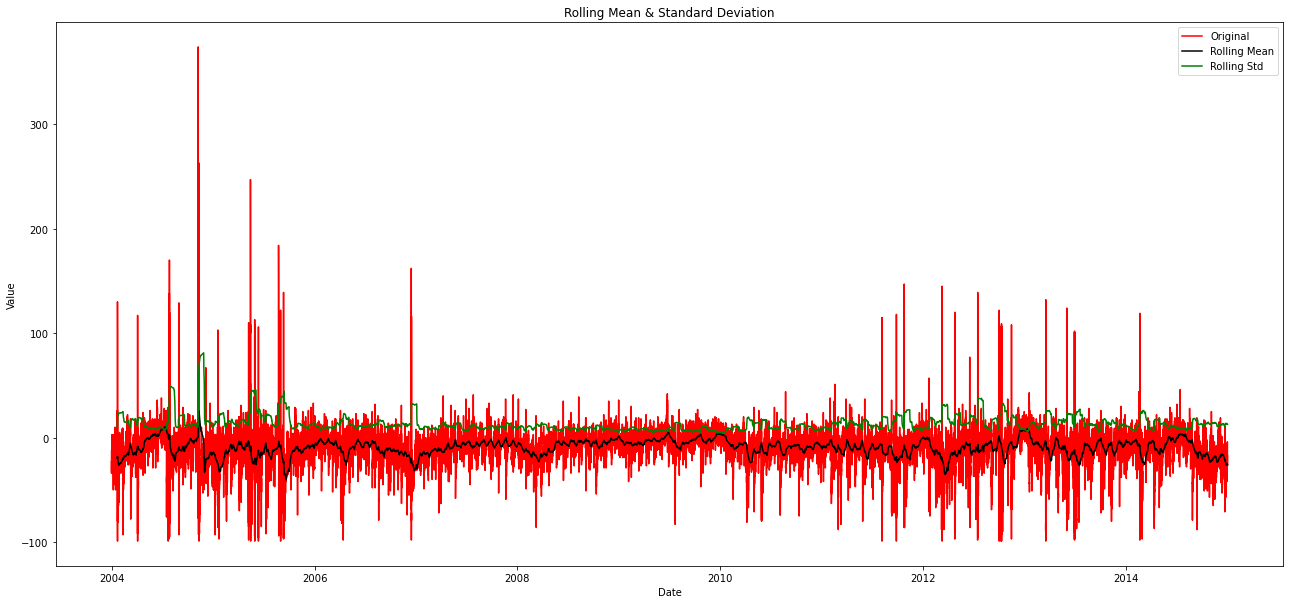

In [12]:
def check_mean_std(ts):
    rolmean = ts.rolling(500).mean()
    rolstd = ts.rolling(500).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
check_mean_std(ts)

In [15]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts)

KeyboardInterrupt: 

test statistic -25.75230134613567,
p-value 0.0

Since the p-value is < .05, we reject the null hypothesis.

This means the time series is stationary. In other words, it has some no time-dependent structure and has constant variance over time.



    Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (no stationary)
    Second one is constant variance. It looks like constant. (yes stationary)
    Third one is that If the test statistic is less than the critical value, we can say that time series is stationary. Lets look:
        test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is bigger than the critical values. (no stationary)
    As a result, we sure that our time series is not stationary.
    Lets make time series stationary at the next part.



/Users/ksenialysanuk/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



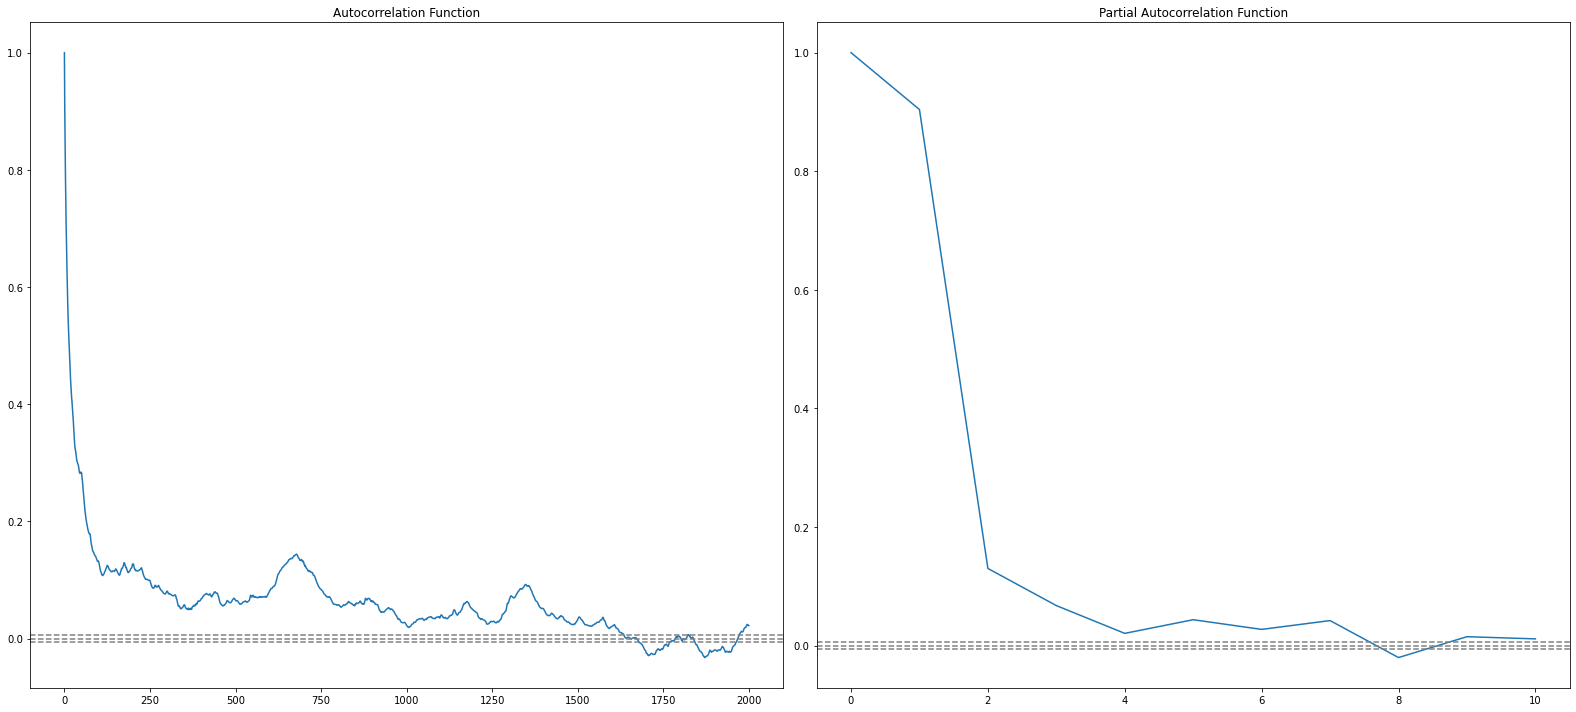

In [13]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts, nlags=2000)
lag_pacf = pacf(ts, nlags=10, method='ols')
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()



Text(0.5, 1.0, 'Autocorrelation Function')

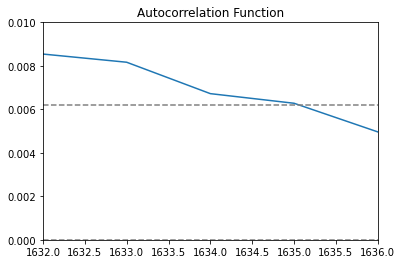

In [15]:

plt.ylim([0, 0.01])
plt.xlim([1632, 1636])
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')



    Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values
        Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time. p=1635.
        Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time. q=8.
    Now lets use (1635,0,8) as parameters of ARIMA models and predict
        ARIMA: from statsmodels libarary
        datetime: we will use it start and end indexes of predict method



In [16]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

model2 = ARIMA(ts, order=(1635,0,8))
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)

/Users/ksenialysanuk/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ksenialysanuk/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ksenialysanuk/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



TypeError: fit() got an unexpected keyword argument 'disp'

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(df1['Дата'],df1[''],label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()

In [2]:
import pandas as pd

df = pd.read_csv('small_data.csv')

In [3]:
df

,Дата,Базисное значение,Среднесуточное значение,Текущее значение
0,2004-01-01 00:00:00,0,-25,-23
1,2004-01-01 01:00:00,0,-25,-25
2,2004-01-01 02:00:00,0,-25,-34
3,2004-01-01 03:00:00,0,-25,-33
4,2004-01-01 04:00:00,0,-25,-31
...,...,...,...,...
100445,2014-12-31 20:00:00,0,-17,-27
100446,2014-12-31 21:00:00,0,-17,-27
100447,2014-12-31 22:00:00,0,-17,-23
100448,2014-12-31 23:00:00,0,-17,-23
